In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('KUfacility_register_data_for_uploadWAISWAetalPLOSONE82020.csv')

In [3]:
data.shape

(61018, 22)

In [4]:
data.head()

,id,country,facility_coded,referral_in,apgar_1,apgar_5,sex,baby_discharge_status,multiple,bba,...,record_type,mothers_age_cat,c_mother_status,c_cat_ga,c_cat_bw,c_mode_of_delivery,quarter,c_baby_status,c_birth_outcome,c_birth_weight_g2
0,162230,2,HF0004,1,7.0,9.0,Male,NaN,1.0,0,...,Birth,≤19,Discharged_Alive,28-30wks,1000-1499g,Vaginal_Delivery,Q1,Undocumented_LB,Born_Alive,1400.0
1,127964,2,HF0005,NaN,NaN,NaN,NaN,NaN,1.0,0,...,Discharge_Preg,≤19,Discharged_Alive,NaN,NaN,NaN,Q2,Undocumented_LB,Born_Alive,NaN
2,148113,2,HF0006,0,NaN,NaN,NaN,NaN,1.0,0,...,Discharge_Preg,≤19,Discharged_Alive,NaN,NaN,NaN,Q4,Undocumented_LB,Born_Alive,NaN
3,95858,1,HF014,NaN,10.0,10.0,Male,Alive,NaN,0,...,Birth,≤19,Alive,37wks+,3000-3499g,Vaginal_Delivery,Q4,Live_Baby,Born_Alive,3000.0
4,206414,1,HF007,NaN,9.0,10.0,Male,Alive,1.0,0,...,Birth,≤19,alive,37wks+,2500-2999g,Vaginal_Delivery,Q1,Live_Baby,Born_Alive,2800.0


In [5]:
data.columns

Index(['id', 'country', 'facility_coded', 'referral_in', 'apgar_1', 'apgar_5',
       'sex', 'baby_discharge_status', 'multiple', 'bba', 'doc_abortion',
       'doc_iufd', 'record_type', 'mothers_age_cat', 'c_mother_status',
       'c_cat_ga', 'c_cat_bw', 'c_mode_of_delivery', 'quarter',
       'c_baby_status', 'c_birth_outcome', 'c_birth_weight_g2'],
      dtype='object')

In [6]:
df_new= data[['country', 'facility_coded', 'referral_in','sex','multiple','bba', 'doc_abortion', 'doc_iufd','mothers_age_cat',
          'c_cat_ga','c_cat_bw','c_birth_outcome','c_birth_weight_g2']]

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61018 entries, 0 to 61017
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            61018 non-null  int64  
 1   facility_coded     61018 non-null  object 
 2   referral_in        36636 non-null  object 
 3   sex                47357 non-null  object 
 4   multiple           59472 non-null  float64
 5   bba                61018 non-null  int64  
 6   doc_abortion       61018 non-null  int64  
 7   doc_iufd           670 non-null    float64
 8   mothers_age_cat    61018 non-null  object 
 9   c_cat_ga           49974 non-null  object 
 10  c_cat_bw           47194 non-null  object 
 11  c_birth_outcome    61018 non-null  object 
 12  c_birth_weight_g2  47194 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 6.1+ MB


In [8]:
df_new.describe()

,country,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2
count,61018.000000,59472.000000,61018.000000,61018.000000,670.0,47194.000000
mean,1.692369,1.035378,0.009931,0.042102,1.0,3098.569733
std,0.461516,0.190383,0.099162,0.200824,0.0,690.806056
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.0,2800.000000
50%,2.000000,1.000000,0.000000,0.000000,1.0,3100.000000
75%,2.000000,1.000000,0.000000,0.000000,1.0,3500.000000
max,2.000000,3.000000,1.000000,1.000000,1.0,38800.000000


In [9]:
df_new['c_birth_outcome'].value_counts()

Born_Alive     56588
Still_Birth     4430
Name: c_birth_outcome, dtype: int64

In [10]:
#percentage of birth outcomes
df_new.c_birth_outcome.value_counts() / len(df_new) * 100

Born_Alive     92.739847
Still_Birth     7.260153
Name: c_birth_outcome, dtype: float64

In [11]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
0,2,HF0004,1,Male,1.0,0,0,NaN,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,NaN,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
2,2,HF0006,0,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
3,1,HF014,NaN,Male,NaN,0,0,NaN,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,NaN,Male,1.0,0,0,NaN,≤19,37wks+,2500-2999g,Born_Alive,2800.0


In [12]:
#How many null values each feature contains in terms of percentage
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.000000
facility_coded        0.000000
bba                   0.000000
doc_abortion          0.000000
mothers_age_cat       0.000000
c_birth_outcome       0.000000
multiple              2.533679
c_cat_ga             18.099577
sex                  22.388476
c_cat_bw             22.655610
c_birth_weight_g2    22.655610
referral_in          39.958701
doc_iufd             98.901963
dtype: float64

In [13]:
df_new.shape

(61018, 13)

In [14]:
df_new.drop_duplicates()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2
0,2,HF0004,1,Male,1.0,0,0,NaN,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,NaN,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
2,2,HF0006,0,NaN,1.0,0,0,NaN,≤19,NaN,NaN,Born_Alive,NaN
3,1,HF014,NaN,Male,NaN,0,0,NaN,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,NaN,Male,1.0,0,0,NaN,≤19,37wks+,2500-2999g,Born_Alive,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61013,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3000-3499g,Born_Alive,3000.0
61014,1,HF023,NaN,Male,1.0,0,0,NaN,missing,34-36wks,3000-3499g,Born_Alive,3100.0
61015,1,HF023,NaN,Female,1.0,0,0,NaN,missing,37wks+,3500g+,Born_Alive,3600.0
61016,1,HF023,NaN,NaN,1.0,0,0,NaN,missing,NaN,NaN,Born_Alive,NaN


In [15]:
df_new.shape

(61018, 13)

In [16]:
df_new['doc_iufd'].value_counts()

1.0    670
Name: doc_iufd, dtype: int64

In [17]:
df_new['doc_iufd'] = np.where(df_new['doc_iufd'].isnull(),0,1)

In [18]:
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.000000
facility_coded        0.000000
bba                   0.000000
doc_abortion          0.000000
doc_iufd              0.000000
mothers_age_cat       0.000000
c_birth_outcome       0.000000
multiple              2.533679
c_cat_ga             18.099577
sex                  22.388476
c_cat_bw             22.655610
c_birth_weight_g2    22.655610
referral_in          39.958701
dtype: float64

In [19]:
df_new['c_cat_bw'].value_counts()

3000-3499g    18377
3500g+        13196
2500-2999g    10653
2000-2499g     2864
1500-1999g     1256
1000-1499g      584
500-999g        215
<500g            49
Name: c_cat_bw, dtype: int64

In [20]:
df_new['sex'].value_counts()

Male             24251
Female           22734
Not_indicated      372
Name: sex, dtype: int64

In [21]:
df_new['c_cat_ga'].value_counts()

37wks+      39417
34-36wks     4954
<24wks       2086
28-30wks     1461
31-33wks     1319
24-27wks      737
Name: c_cat_ga, dtype: int64

In [22]:
df_new['multiple'].value_counts()

1.0    57431
2.0     1978
3.0       63
Name: multiple, dtype: int64

In [23]:
#Replaceing the missing categorical values of features c_cat_bw,sex,c_cat_ga,multiple with the most frequent values
def replace_nan(df,feature):
    most_frequent_category=df[feature].mode()[0]
    df[feature].fillna(most_frequent_category,inplace=True)

In [24]:
for feature in ['c_cat_bw','sex','c_cat_ga','multiple']:
    replace_nan(df_new,feature)

In [25]:
df_new.isnull().sum().sort_values(ascending=False)

referral_in          24382
c_birth_weight_g2    13824
country                  0
facility_coded           0
sex                      0
multiple                 0
bba                      0
doc_abortion             0
doc_iufd                 0
mothers_age_cat          0
c_cat_ga                 0
c_cat_bw                 0
c_birth_outcome          0
dtype: int64

In [26]:
df_new['c_birth_weight_g2'].dropna().sample(df_new['c_birth_weight_g2'].isnull().sum(),random_state=0)

51635    3000.0
53168    3600.0
52240    3100.0
52084    3900.0
46324    3600.0
          ...  
50194    3000.0
30027    3400.0
6486     3000.0
13904    4000.0
15035    3100.0
Name: c_birth_weight_g2, Length: 13824, dtype: float64

In [27]:
def impute_nan(df,variable):
    df[variable+"_"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_']=random_sample

In [28]:
impute_nan(df_new,"c_birth_weight_g2")

In [29]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,NaN,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0


In [30]:
print(df_new['c_birth_weight_g2'].std())
print(df_new['c_birth_weight_g2_'].std())

690.8060562662702
681.7995266288918


In [31]:
df_new.isnull().mean().sort_values(ascending=True)*100

country                0.000000
facility_coded         0.000000
sex                    0.000000
multiple               0.000000
bba                    0.000000
doc_abortion           0.000000
doc_iufd               0.000000
mothers_age_cat        0.000000
c_cat_ga               0.000000
c_cat_bw               0.000000
c_birth_outcome        0.000000
c_birth_weight_g2_     0.000000
c_birth_weight_g2     22.655610
referral_in           39.958701
dtype: float64

In [32]:
df_new.head(30)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,NaN,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0
5,1,HF008,NaN,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,NaN,3100.0
6,2,HF0005,NaN,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,NaN,3900.0
7,2,HF0005,NaN,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
8,2,HF0005,0,Male,1.0,0,1,0,≤19,<24wks,3000-3499g,Still_Birth,NaN,2500.0
9,2,HF0006,0,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,NaN,3600.0


In [33]:
df_new['referral_in'].value_counts()

0      32302
1       4331
yes        3
Name: referral_in, dtype: int64

In [34]:
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [35]:
impute_nan(df_new,'referral_in')

In [36]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,NaN,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0,2800.0


In [37]:
colsToDrop=['c_birth_weight_g2']
df_new.drop(columns = colsToDrop, inplace = True)

In [38]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0


In [39]:
df_new.isnull().mean().sort_values(ascending=True)*100

country               0.0
facility_coded        0.0
referral_in           0.0
sex                   0.0
multiple              0.0
bba                   0.0
doc_abortion          0.0
doc_iufd              0.0
mothers_age_cat       0.0
c_cat_ga              0.0
c_cat_bw              0.0
c_birth_outcome       0.0
c_birth_weight_g2_    0.0
dtype: float64

In [40]:
import seaborn as sns

<Axes: >

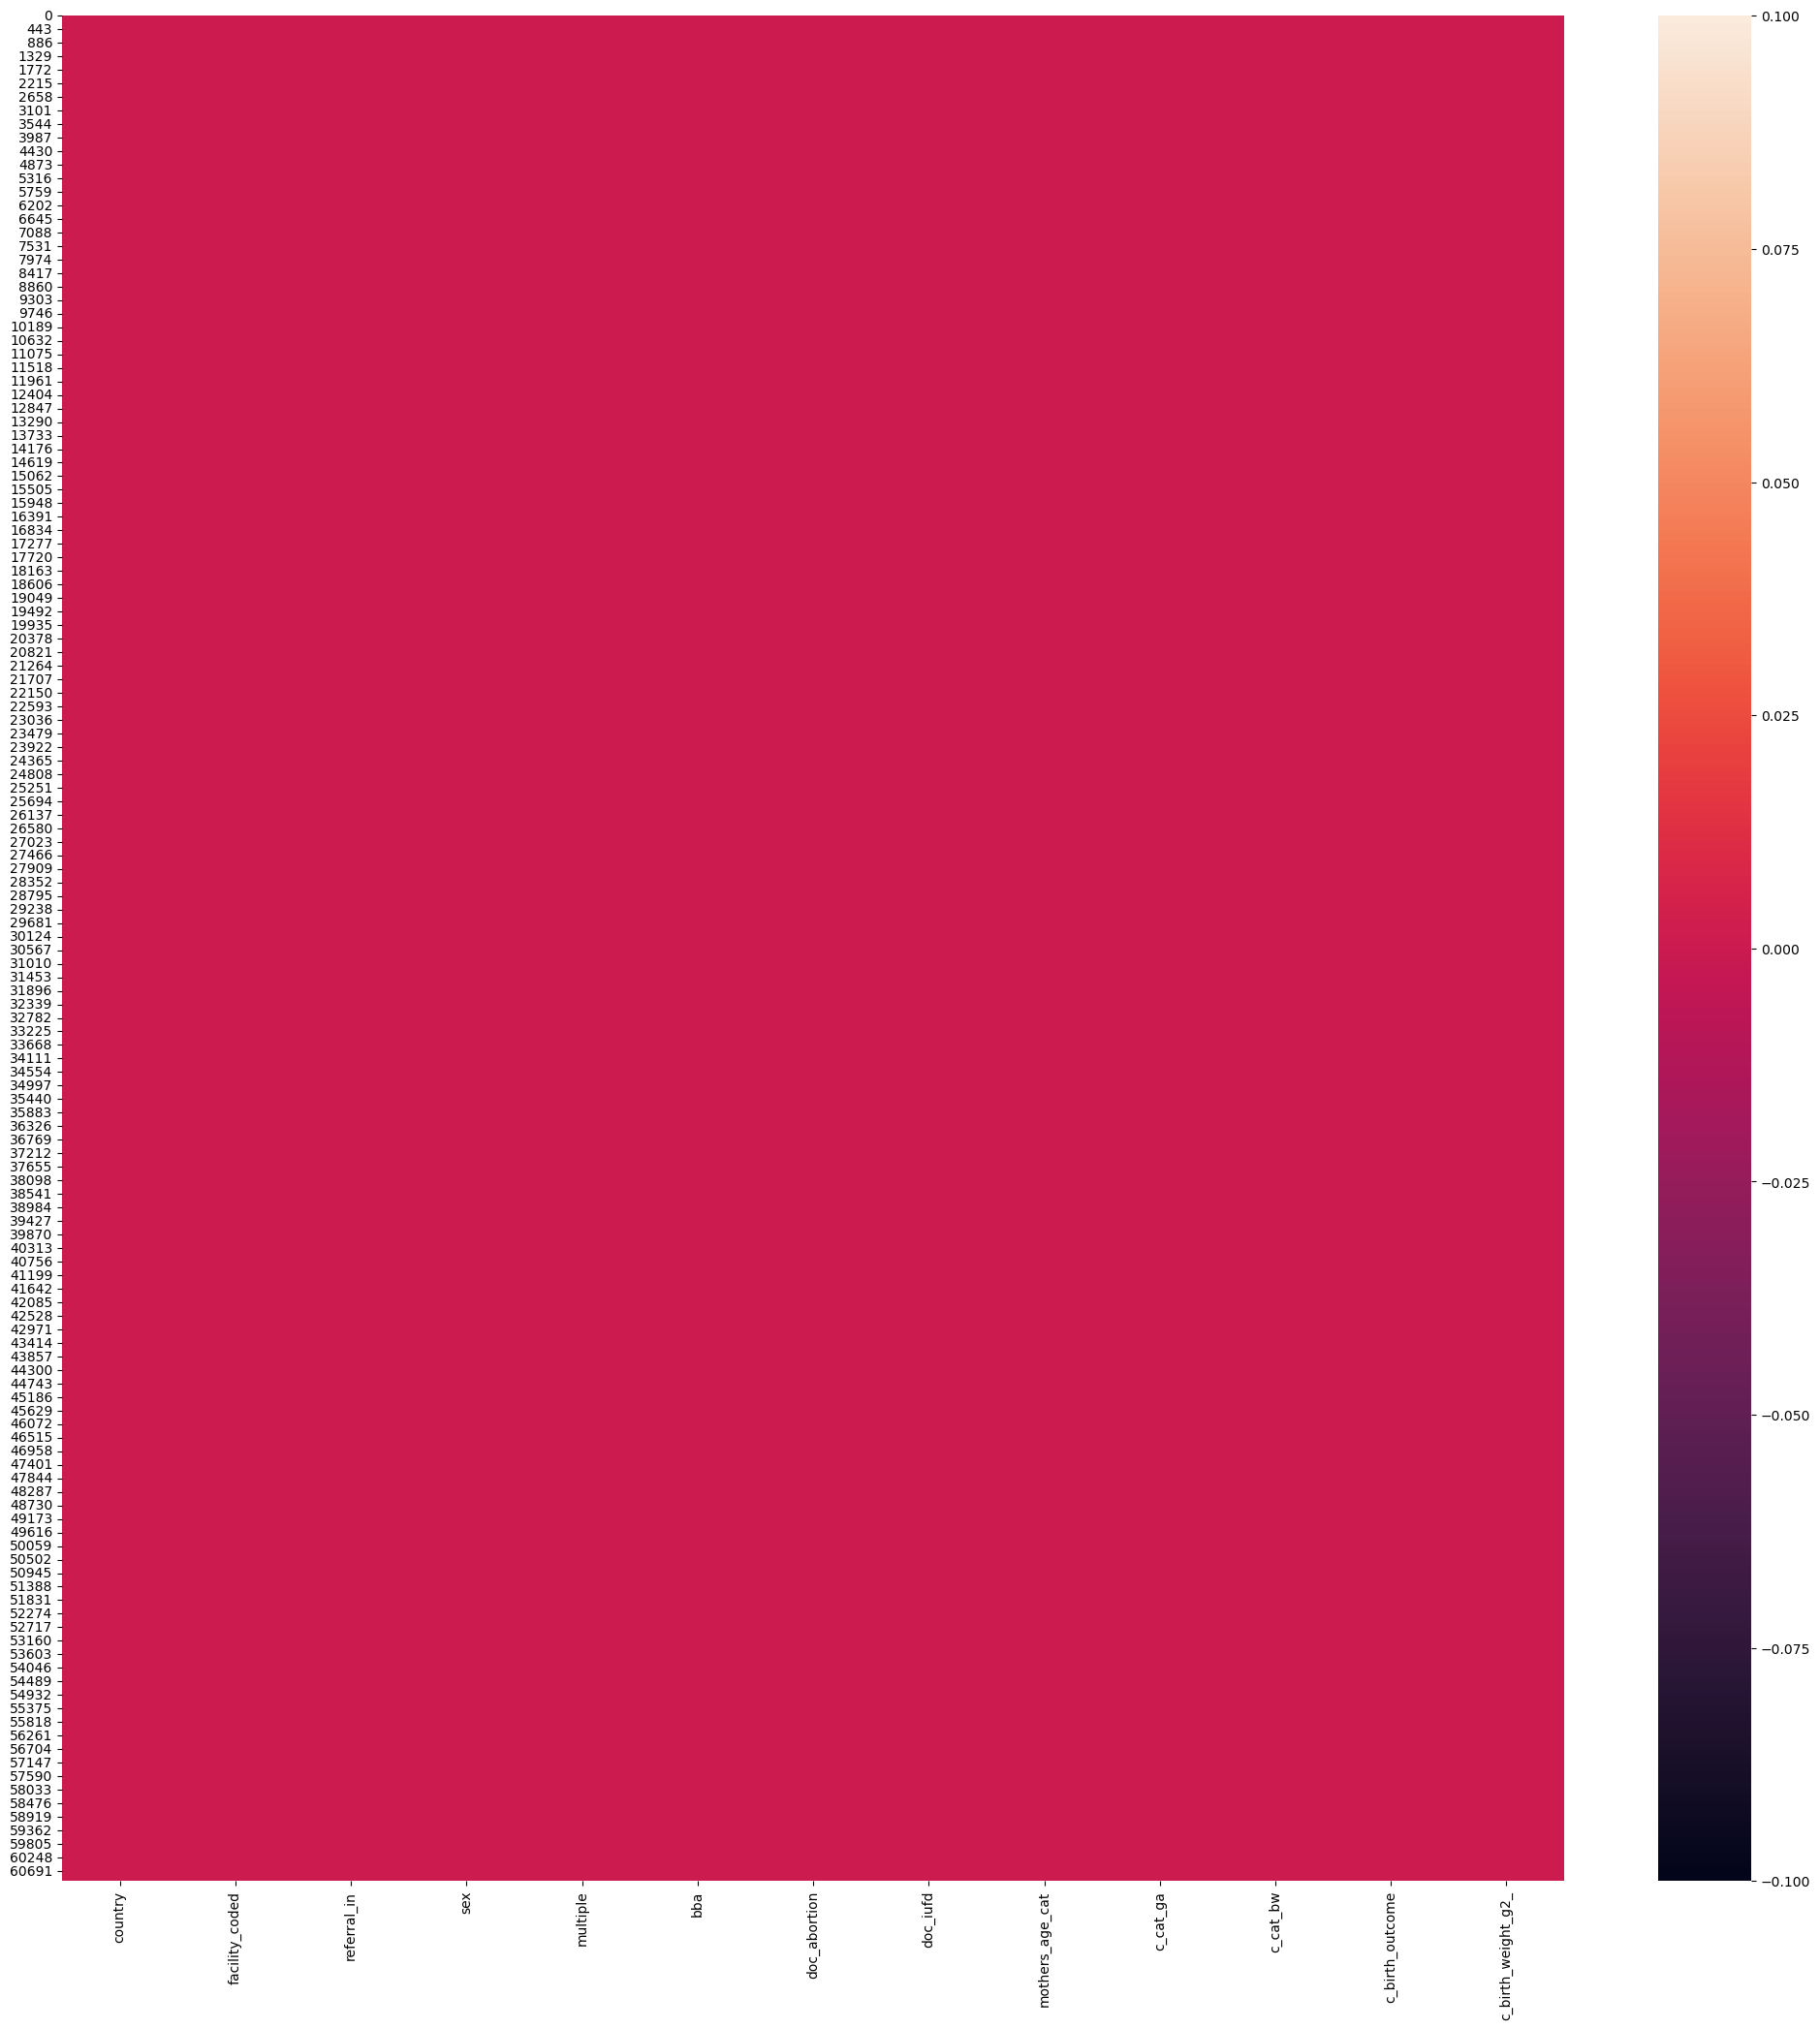

In [41]:
plt.figure(figsize=(25,25))
sns.heatmap(df_new.isnull())

In [42]:
df_new.shape

(61018, 13)

In [43]:
df_new.columns

Index(['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw',
       'c_birth_outcome', 'c_birth_weight_g2_'],
      dtype='object')

In [44]:
df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
0,2,HF0004,1,Male,1.0,0,0,0,≤19,28-30wks,1000-1499g,Born_Alive,1400.0
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0


In [45]:
df_new['doc_abortion'].value_counts()

0    58449
1     2569
Name: doc_abortion, dtype: int64

<Axes: xlabel='doc_abortion', ylabel='count'>

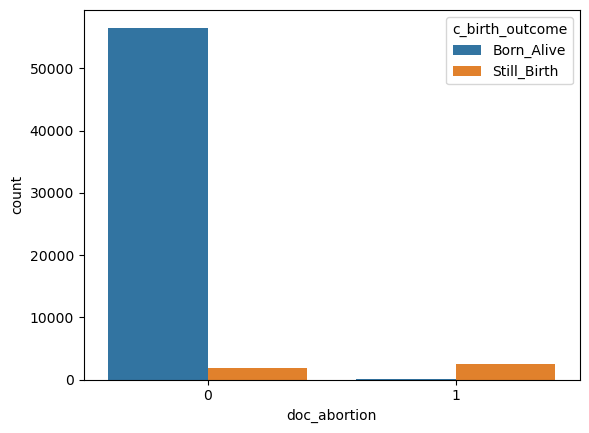

In [46]:
sns.countplot(x = 'doc_abortion', data = df_new,hue='c_birth_outcome')

In [47]:
df_new['mothers_age_cat'].value_counts()

20-24      20898
25-29      13915
≤19        12755
30-34       8187
≥35         4607
missing      656
Name: mothers_age_cat, dtype: int64

In [48]:
df_new.groupby(['mothers_age_cat','c_birth_outcome'])['c_birth_outcome'].count()

mothers_age_cat  c_birth_outcome
20-24            Born_Alive         19622
                 Still_Birth         1276
25-29            Born_Alive         12913
                 Still_Birth         1002
30-34            Born_Alive          7456
                 Still_Birth          731
missing          Born_Alive           594
                 Still_Birth           62
≤19              Born_Alive         11945
                 Still_Birth          810
≥35              Born_Alive          4058
                 Still_Birth          549
Name: c_birth_outcome, dtype: int64

<Axes: xlabel='mothers_age_cat', ylabel='count'>

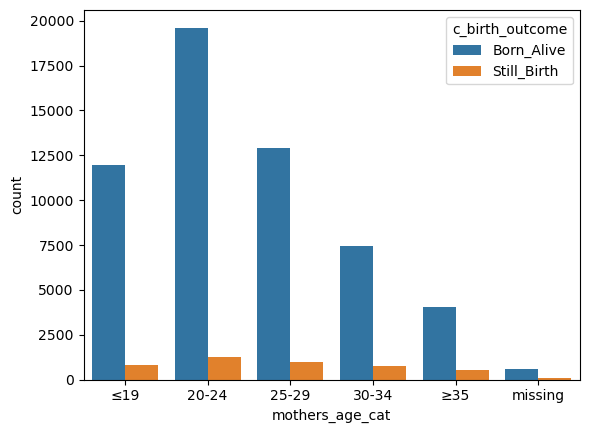

In [49]:
sns.countplot(x = 'mothers_age_cat', data = df_new,hue='c_birth_outcome')

In [50]:
df_new.groupby(['doc_iufd','c_birth_outcome'])['c_birth_outcome'].count()

doc_iufd  c_birth_outcome
0         Born_Alive         56422
          Still_Birth         3926
1         Born_Alive           166
          Still_Birth          504
Name: c_birth_outcome, dtype: int64

<Axes: xlabel='doc_iufd', ylabel='count'>

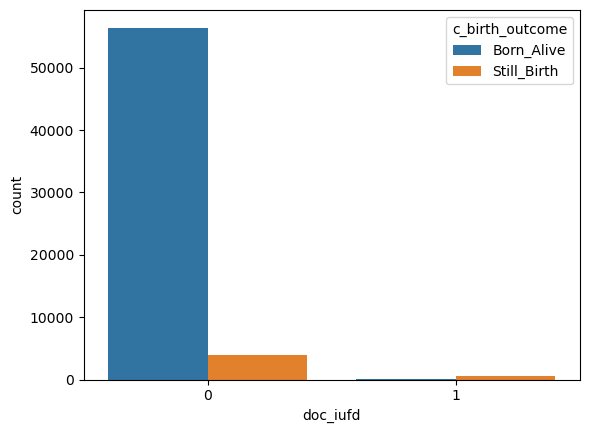

In [51]:
sns.countplot(x = 'doc_iufd', data = df_new,hue='c_birth_outcome')

In [52]:
df_new.groupby(['c_cat_ga','c_birth_outcome'])['c_birth_outcome'].count()

c_cat_ga  c_birth_outcome
24-27wks  Born_Alive           533
          Still_Birth          204
28-30wks  Born_Alive          1258
          Still_Birth          203
31-33wks  Born_Alive          1192
          Still_Birth          127
34-36wks  Born_Alive          4708
          Still_Birth          246
37wks+    Born_Alive         47900
          Still_Birth         2561
<24wks    Born_Alive           997
          Still_Birth         1089
Name: c_birth_outcome, dtype: int64

<Axes: xlabel='c_cat_ga', ylabel='count'>

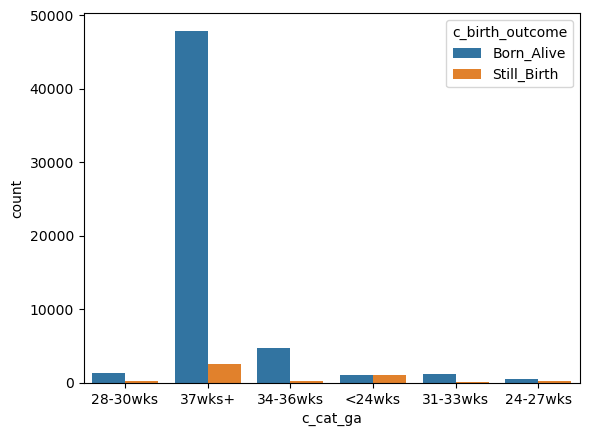

In [53]:
sns.countplot(x = 'c_cat_ga', data = df_new,hue='c_birth_outcome')

In [54]:
Q1 = df_new['c_birth_weight_g2_'].quantile(0.25)
Q3 = df_new['c_birth_weight_g2_'].quantile(0.75)

In [55]:
IQR = Q3-Q1

In [56]:
lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5

In [57]:
my_df_new = df_new[(df_new['c_birth_weight_g2_']>lower_limit)&(df_new['c_birth_weight_g2_']<upper_limit)]

In [58]:
my_df_new.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0


In [59]:
my_df_new.shape

(58732, 13)

<Axes: xlabel='sex', ylabel='c_birth_weight_g2_'>

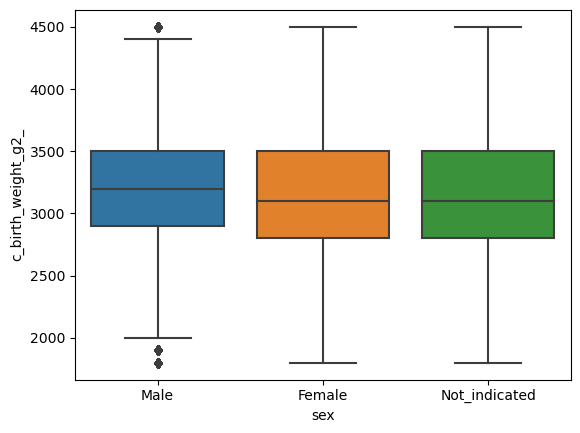

In [60]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', data=my_df_new)

<Axes: xlabel='sex', ylabel='c_birth_weight_g2_'>

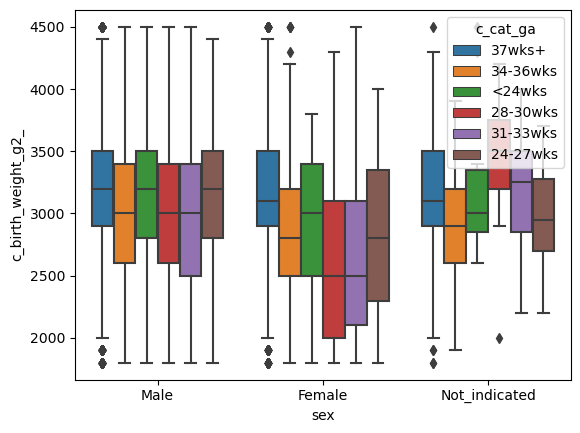

In [61]:
sns.boxplot(y='c_birth_weight_g2_', x='sex', hue='c_cat_ga', data=my_df_new)

<Axes: xlabel='country', ylabel='c_birth_weight_g2_'>

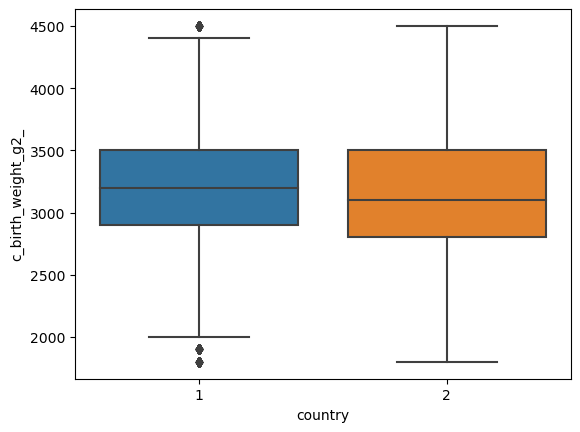

In [62]:
sns.boxplot(y='c_birth_weight_g2_', x='country', data=my_df_new)

<Axes: xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

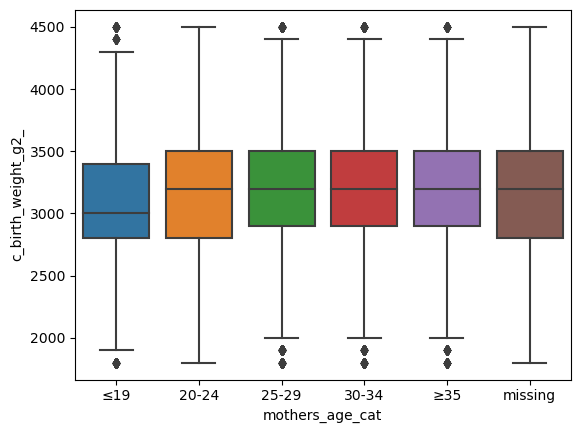

In [63]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', data=my_df_new)

<Axes: xlabel='mothers_age_cat', ylabel='c_birth_weight_g2_'>

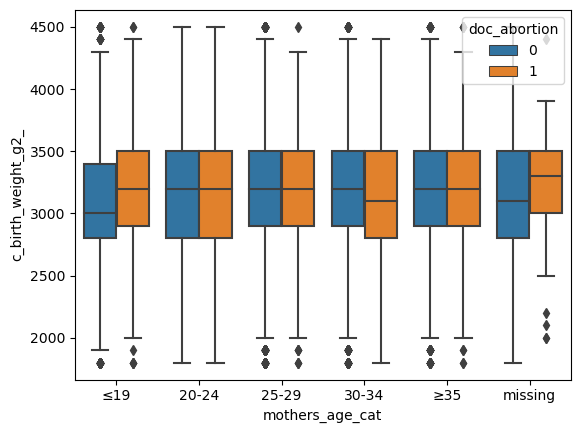

In [64]:
sns.boxplot(y='c_birth_weight_g2_', x='mothers_age_cat', hue='doc_abortion', data=my_df_new)

<Axes: xlabel='doc_abortion', ylabel='c_birth_weight_g2_'>

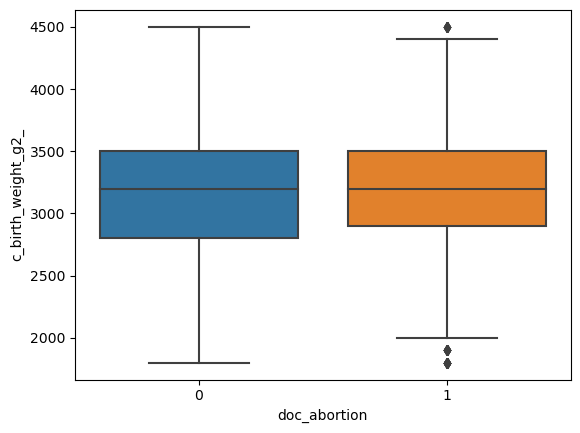

In [65]:
sns.boxplot(y='c_birth_weight_g2_', x='doc_abortion', data=my_df_new)

<Axes: xlabel='c_cat_ga', ylabel='c_birth_weight_g2_'>

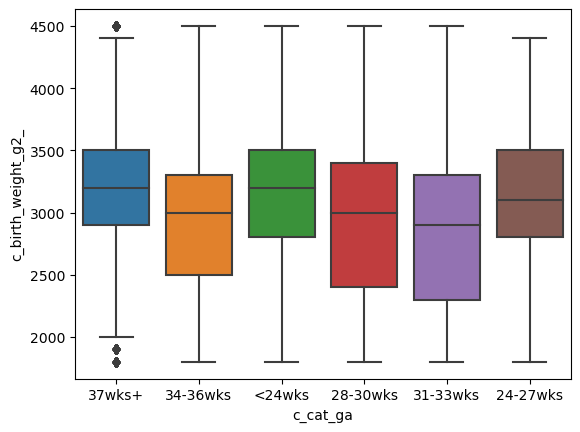

In [66]:
sns.boxplot(y='c_birth_weight_g2_', x='c_cat_ga', data=my_df_new)

<Axes: xlabel='bba', ylabel='c_birth_weight_g2_'>

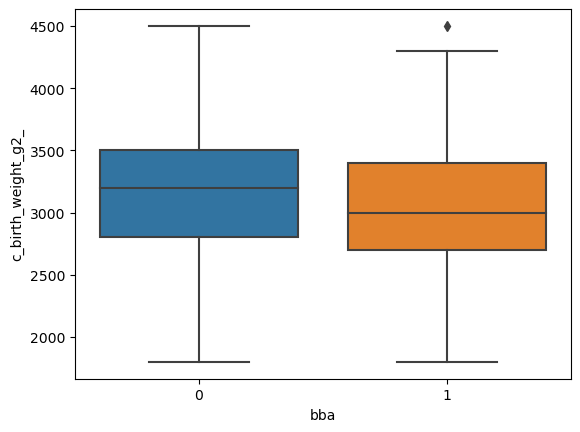

In [67]:
sns.boxplot(y='c_birth_weight_g2_', x='bba', data=my_df_new)

<Axes: xlabel='doc_iufd', ylabel='c_birth_weight_g2_'>

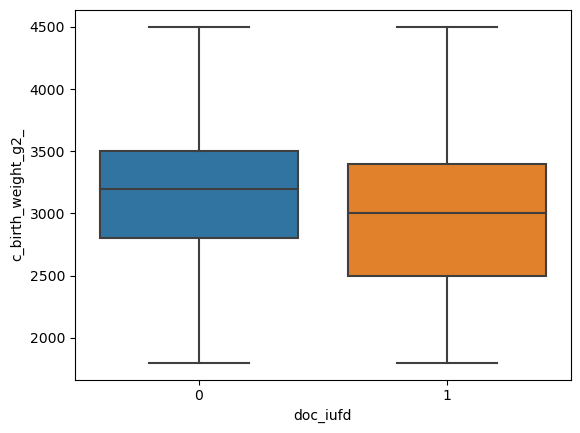

In [68]:
sns.boxplot(y='c_birth_weight_g2_', x='doc_iufd', data=my_df_new)

In [69]:
my_df_new.head(10)

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_outcome,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,Born_Alive,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,Born_Alive,3100.0
6,2,HF0005,Missing,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,3900.0
7,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,Born_Alive,3600.0
8,2,HF0005,0,Male,1.0,0,1,0,≤19,<24wks,3000-3499g,Still_Birth,2500.0
9,2,HF0006,0,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,3600.0
10,2,HF0006,0,Male,1.0,0,1,0,≤19,37wks+,3000-3499g,Still_Birth,3500.0


In [70]:
my_df_new.shape

(58732, 13)

In [71]:
y =my_df_new['c_birth_outcome']
X = my_df_new.drop(columns = 'c_birth_outcome')

In [72]:
X.head()

,country,facility_coded,referral_in,sex,multiple,bba,doc_abortion,doc_iufd,mothers_age_cat,c_cat_ga,c_cat_bw,c_birth_weight_g2_
1,2,HF0005,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
2,2,HF0006,0,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3600.0
3,1,HF014,Missing,Male,1.0,0,0,0,≤19,37wks+,3000-3499g,3000.0
4,1,HF007,Missing,Male,1.0,0,0,0,≤19,37wks+,2500-2999g,2800.0
5,1,HF008,Missing,Male,1.0,0,0,0,≤19,34-36wks,3000-3499g,3100.0


In [73]:
y.head()

1    Born_Alive
2    Born_Alive
3    Born_Alive
4    Born_Alive
5    Born_Alive
Name: c_birth_outcome, dtype: object

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20,stratify = y)

In [75]:
%matplotlib inline

In [76]:
corr = X_train.corr()
corr

,country,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2_
country,1.000000,0.085055,0.010657,0.113688,0.026678,-0.080612
multiple,0.085055,1.000000,0.004744,-0.029841,-0.001791,-0.209550
bba,0.010657,0.004744,1.000000,-0.019261,-0.009122,-0.024391
doc_abortion,0.113688,-0.029841,-0.019261,1.000000,-0.003133,0.002824
doc_iufd,0.026678,-0.001791,-0.009122,-0.003133,1.000000,-0.039821
c_birth_weight_g2_,-0.080612,-0.209550,-0.024391,0.002824,-0.039821,1.000000


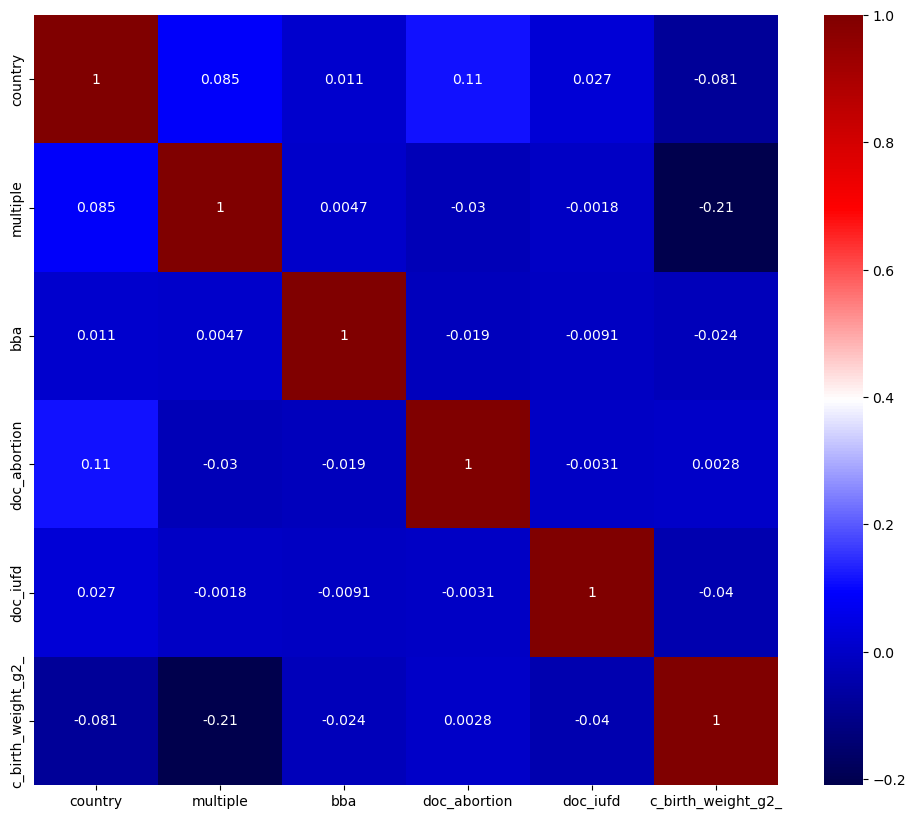

In [77]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

In [78]:
numerical_features = [feature for feature in my_df_new.columns if my_df_new[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
my_df_new[numerical_features].head()

Number of numerical variables:  6


,country,multiple,bba,doc_abortion,doc_iufd,c_birth_weight_g2_
1,2,1.0,0,0,0,3000.0
2,2,1.0,0,0,0,3600.0
3,1,1.0,0,0,0,3000.0
4,1,1.0,0,0,0,2800.0
5,1,1.0,0,0,0,3100.0


In [79]:
new_raw_data = pd.get_dummies(my_df_new, columns = ['country', 'facility_coded', 'referral_in', 'sex', 'multiple', 'bba',
       'doc_abortion', 'doc_iufd', 'mothers_age_cat', 'c_cat_ga', 'c_cat_bw'])
print(new_raw_data.shape)
new_raw_data.head()

(58732, 60)


,c_birth_outcome,c_birth_weight_g2_,country_1,country_2,facility_coded_HF0001,facility_coded_HF0002,facility_coded_HF0003,facility_coded_HF0004,facility_coded_HF0005,facility_coded_HF0006,...,c_cat_ga_28-30wks,c_cat_ga_31-33wks,c_cat_ga_34-36wks,c_cat_ga_37wks+,c_cat_ga_<24wks,c_cat_bw_1500-1999g,c_cat_bw_2000-2499g,c_cat_bw_2500-2999g,c_cat_bw_3000-3499g,c_cat_bw_3500g+
1,Born_Alive,3000.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,Born_Alive,3600.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,Born_Alive,3000.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,Born_Alive,2800.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,Born_Alive,3100.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [80]:
X = new_raw_data.drop(columns = 'c_birth_outcome').values# Input features (attributes)
y = new_raw_data['c_birth_outcome'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0,stratify=y)

X shape: (58732, 59)
y shape: (58732,)


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [82]:
decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train, y_train)
y_pred = decision_clf.predict(X_test)


In [83]:
accuracy_score(y_test,y_pred)

0.9698646462926704

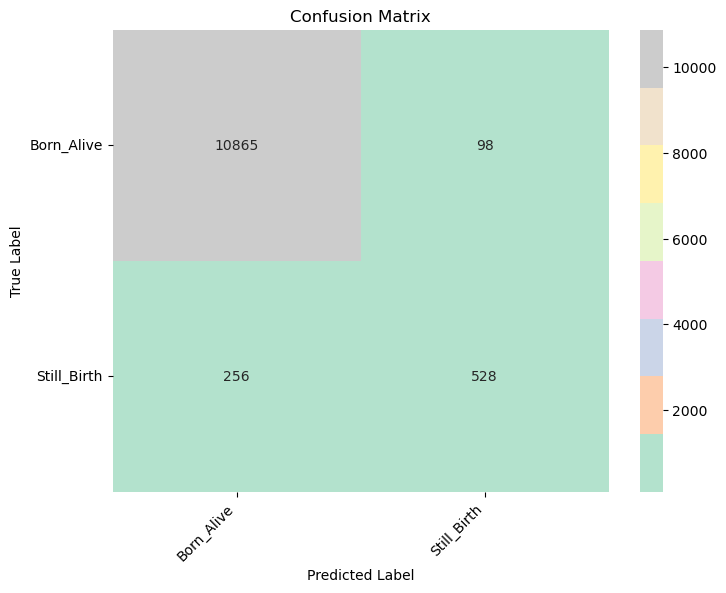

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
labels = ['Born_Alive', 'Still_Birth']
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2')
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

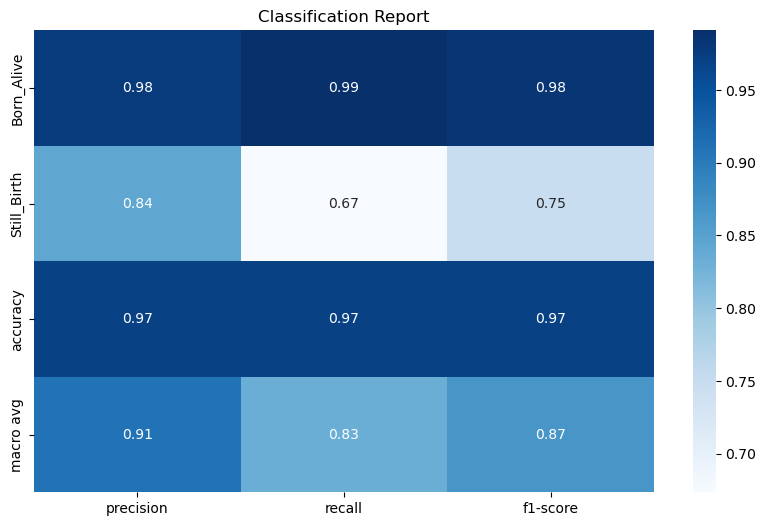

In [85]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,
    max_depth=5,
    criterion='gini',
    random_state=42
  )
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [87]:
y_pred1 = classifier.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred1)

0.9741210521835362

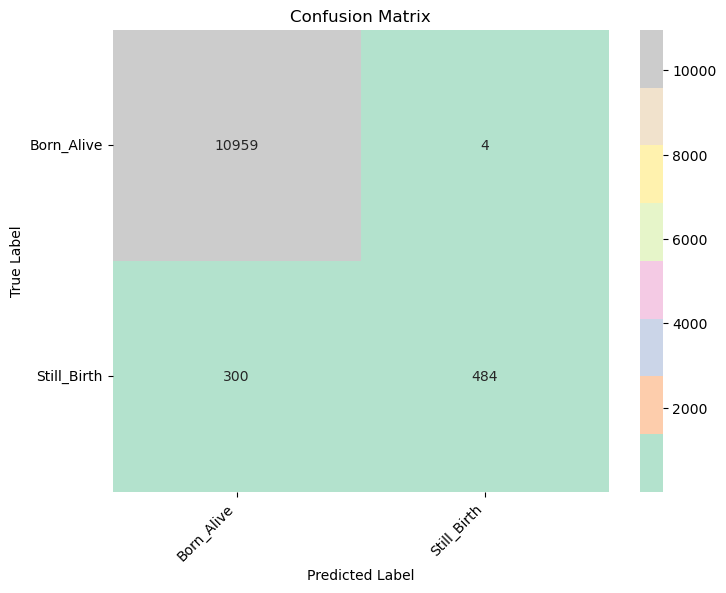

In [89]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
labels = ['Born_Alive', 'Still_Birth']
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2')
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

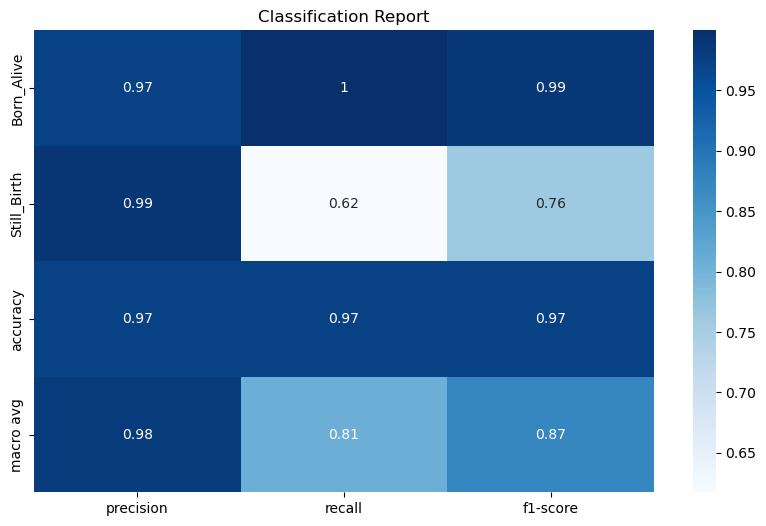

In [90]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred1, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

In [92]:
n_estimators = 1500 
max_depth = 10
random_state = 42  

In [93]:
extra_trees_classifier = ExtraTreesClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    criterion='gini',
    random_state=random_state
)


In [94]:
extra_trees_classifier.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=10, n_estimators=1500, random_state=42)

In [95]:
y_pred2 = extra_trees_classifier.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred2)

0.9775261768962288

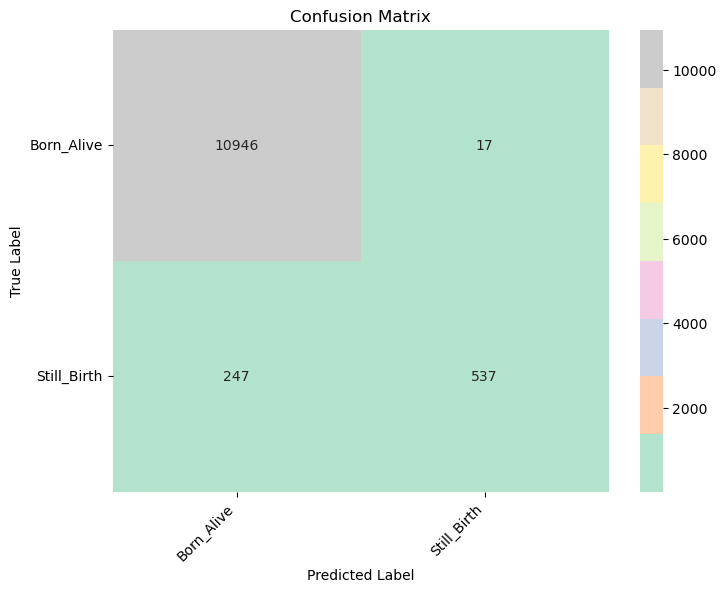

In [97]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2')
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

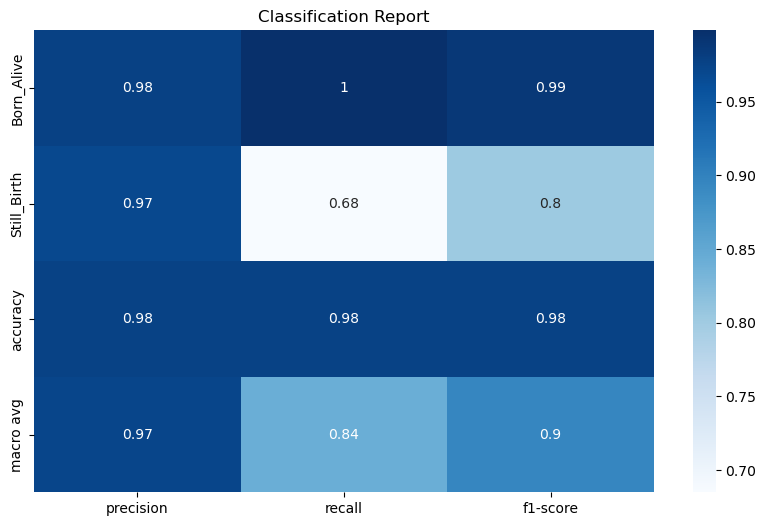

In [98]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred2, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [99]:
n_estimators = 100
max_features = 'sqrt'
random_state = 42

In [100]:
rf_classifier = RandomForestClassifier(
    n_estimators=n_estimators,
    max_features=max_features,
    oob_score=True,  
    random_state=random_state
)

In [101]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [102]:
y_pred3 = rf_classifier.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred3)

0.9744615646548055

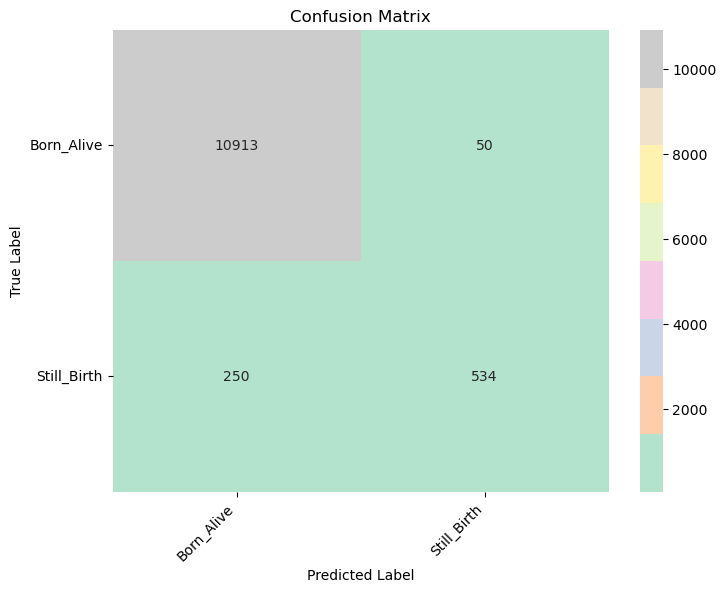

In [104]:
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2')
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

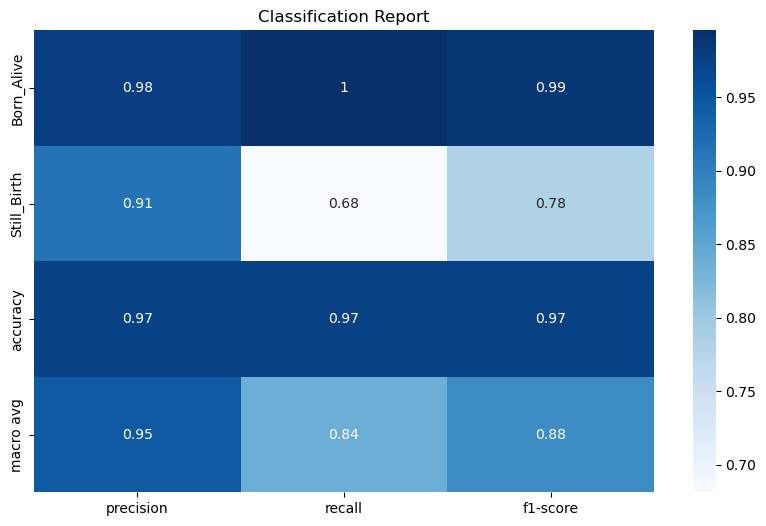

In [105]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred3, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [106]:
n_estimators = 1500
max_depth = 10
random_state = 42

In [107]:
extra_trees_classifier1 = ExtraTreesClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    criterion='gini',
    oob_score=True,
    bootstrap=True,
    random_state=random_state
)

In [108]:
extra_trees_classifier1.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=10, n_estimators=1500,
                     oob_score=True, random_state=42)

In [109]:
y_pred4 = extra_trees_classifier1.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred4)

0.9776113050140461

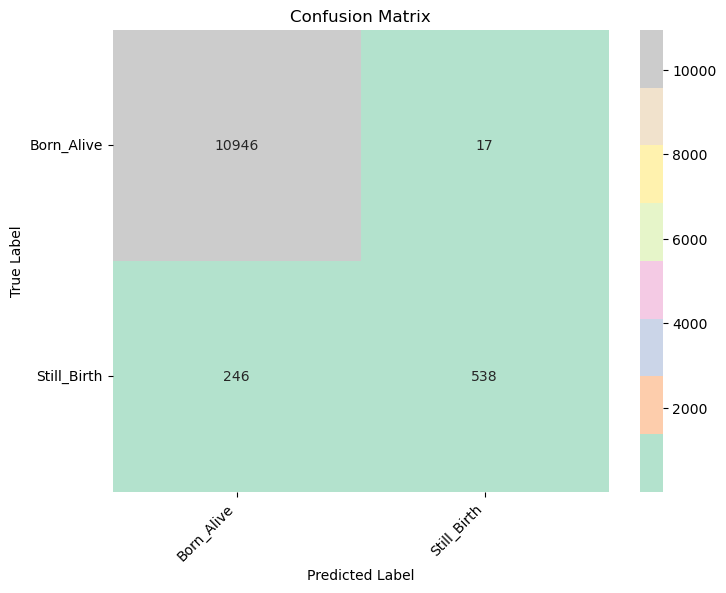

In [111]:
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(8, 6))
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2')
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

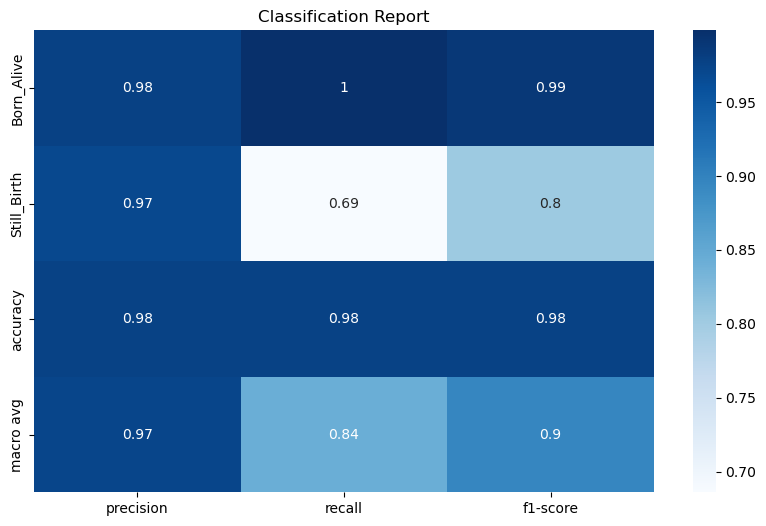

In [112]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred4, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [113]:
new_raw_data.head()

,c_birth_outcome,c_birth_weight_g2_,country_1,country_2,facility_coded_HF0001,facility_coded_HF0002,facility_coded_HF0003,facility_coded_HF0004,facility_coded_HF0005,facility_coded_HF0006,...,c_cat_ga_28-30wks,c_cat_ga_31-33wks,c_cat_ga_34-36wks,c_cat_ga_37wks+,c_cat_ga_<24wks,c_cat_bw_1500-1999g,c_cat_bw_2000-2499g,c_cat_bw_2500-2999g,c_cat_bw_3000-3499g,c_cat_bw_3500g+
1,Born_Alive,3000.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,Born_Alive,3600.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,Born_Alive,3000.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,Born_Alive,2800.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,Born_Alive,3100.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [114]:
new_raw_data.to_csv('new_dataset.csv', index=False)

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the DecisionTreeClassifier
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    class Node:
        def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
            self.gini = gini
            self.num_samples = num_samples
            self.num_samples_per_class = num_samples_per_class
            self.predicted_class = predicted_class
            self.feature_index = 0
            self.threshold = 0
            self.left = None
            self.right = None

    def fit(self, X, y, n_bootstrap_samples=1000):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        bootstrap_indices = self._generate_bootstrap_samples(len(X), n_bootstrap_samples)

        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes_))

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = int(classes[i - 1])  # Convert to integer
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_))
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = self.Node(
            gini=self._gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth and len(y) >= self.min_samples_split and node.gini > 0:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

    def _generate_bootstrap_samples(self, n_samples, n_bootstrap_samples):
        return [np.random.randint(0, n_samples, size=n_samples) for _ in range(n_bootstrap_samples)]

    def cross_validate(self, X, y, num_folds=5, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        fold_size = len(X) // num_folds
        accuracies = []
        for i in range(num_folds):
            start_idx = i * fold_size
            end_idx = start_idx + fold_size if i < num_folds - 1 else len(X)
            X_train = np.concatenate((X[:start_idx], X[end_idx:]), axis=0)
            y_train = np.concatenate((y[:start_idx], y[end_idx:]), axis=0)
            X_val, y_val = X[start_idx:end_idx], y[start_idx:end_idx]
            self.fit(X_train, y_train)
            y_pred = self.predict(X_val)
            accuracy = np.mean(y_pred == y_val)
            accuracies.append(accuracy)
        return accuracies

# Load the dataset
file_path = 'new_dataset.csv'
data = pd.read_csv(file_path)

# Convert the target variable to numerical form
label_encoder = LabelEncoder()
data['c_birth_outcome'] = label_encoder.fit_transform(data['c_birth_outcome'])

# Separate features and target variable
X = data.drop('c_birth_outcome', axis=1).values
y = data['c_birth_outcome'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2)

# Perform cross-validation
num_folds = 5
accuracies = clf.cross_validate(X_train, y_train, num_folds=num_folds)

# Output the accuracy for each fold and the mean accuracy
#print(accuracies) 
print("Accuracy: ",np.mean(accuracies))


Accuracy:  0.976120038310099
